# **Mendeteksi Kebakaran Hutan - Tugas Akhir Computer Vision**

---



#### 1. Elbert Chandra - 202000133
#### 2. Filbert Karsten Thomas -202000422
#### 3. Rivaldo Linogi - 191900177
#### 4. Wira Yudha Tandungan - 202000536

## Import Library

In [28]:
import tensorflow
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

Making saperate datasets for training and testing

## Pembuatan Pre-processing dan Training set

Ini mengatur generator data yang akan digunakan selama training dan testing model. Generator data akan menghasilkan batch gambar yang diproses sebelumnya bersama dengan label yang sesuai, membuat lebih gampang untuk melatih dan mengevaluasi model.

In [89]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

train_dataset = train_datagen.flow_from_directory("Training and Validation/",
                                          target_size=(200,200),
                                          batch_size = 20,
                                          class_mode = 'binary')
                                         
test_dataset = test_datagen.flow_from_directory("Testing/",
                                          target_size=(200,200),
                                          batch_size =20,
                                          class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [90]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

## Model Building dan Compiling model

Kode ini mendefinisikan Convolutional Neural Network (CNN) menggunakan TensorFlow's Keras API. Kode berikut mendefinisikan arsitektur CNN untuk tugas klasifikasi binary image dan mempersiapkannya untuk training.

In [61]:
CNN = keras.Sequential()
CNN.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)))
CNN.add(keras.layers.MaxPool2D(2,2))
CNN.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
CNN.add(keras.layers.MaxPool2D(2,2))
CNN.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
CNN.add(keras.layers.MaxPool2D(2,2))
CNN.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
CNN.add(keras.layers.MaxPool2D(2,2))
CNN.add(keras.layers.Flatten())
CNN.add(keras.layers.Dense(512,activation='relu'))
CNN.add(keras.layers.Dense(1,activation='sigmoid'))
CNN.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Fitting model

Kode berikut melatih model CNN yang ditentukan menggunakan training dataset (train_dataset) untuk jumlah epoch yang ditentukan (dalam kasus ini 10 epoch) dan memvalidasi model pada testing dataset (test_dataset)

In [62]:
r = CNN.fit(x = train_dataset, epochs = 10 ,validation_data=test_dataset)

Epoch 1/10
92/92 [==============================] - 128s 1s/step - loss: 0.2594 - accuracy: 0.9007 - val_loss: 0.3819 - val_accuracy: 0.8676
Epoch 2/10
92/92 [==============================] - 113s 1s/step - loss: 0.1587 - accuracy: 0.9498 - val_loss: 0.4657 - val_accuracy: 0.7500
Epoch 3/10
92/92 [==============================] - 111s 1s/step - loss: 0.1719 - accuracy: 0.9443 - val_loss: 0.3483 - val_accuracy: 0.8676
Epoch 4/10
92/92 [==============================] - 110s 1s/step - loss: 0.1297 - accuracy: 0.9602 - val_loss: 0.2611 - val_accuracy: 0.8824
Epoch 5/10
92/92 [==============================] - 112s 1s/step - loss: 0.1215 - accuracy: 0.9580 - val_loss: 0.3043 - val_accuracy: 0.8382
Epoch 6/10
92/92 [==============================] - 111s 1s/step - loss: 0.1103 - accuracy: 0.9656 - val_loss: 0.1621 - val_accuracy: 0.9412
Epoch 7/10
92/92 [==============================] - 111s 1s/step - loss: 0.0829 - accuracy: 0.9760 - val_loss: 0.3437 - val_accuracy: 0.8382
Epoch 8/10
92

## Prediksi Test Dataset

Kode berikut membuat prediksi pada training dataset menggunakan model CNN terlatih dan kemudian membulatkan prediksi untuk mendapatkan nilai biner (0 atau 1).

In [63]:
predictions = CNN.predict(train_dataset)
predictions = np.round(predictions)

92/92 [==============================] - 30s 316ms/step


In [64]:
predictions

array([[0.],
       [1.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]], dtype=float32)

In [65]:
print(len(predictions))

1832


## Plotting loss per iterasi

Kode berikut menggunakan Matplotlib untuk memplot training loss (loss) dan validation loss (val_loss) di atas epoch selama pelatihan model CNN.

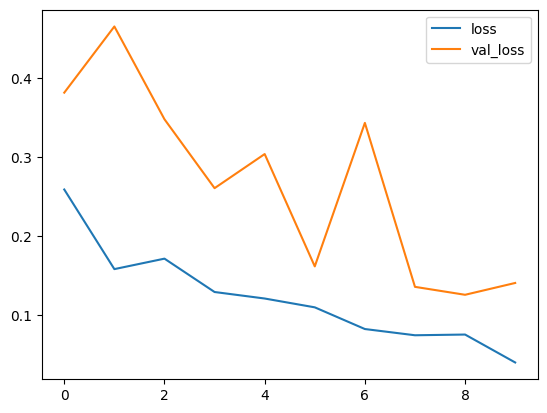

In [66]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

## Plotting accuracy per iterasi

Kode ini menggunakan Matplotlib untuk memplot training accuracy (acc) dan validation accuracy (val_acc) di atas epoch selama pelatihan model CNN.

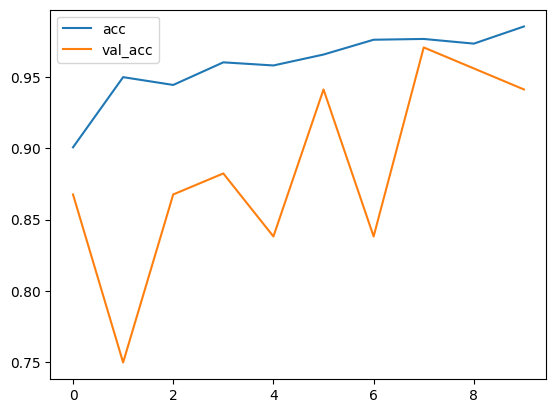

In [67]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

## Membuat function untuk melihat gambar dari dataset dengan label prediksi

Kode ini mendefinisikan fungsi prediksi yang mengambil nama file sebagai input, memuat gambar, membuat prediksi menggunakan model CNN terlatih (CNN), dan menampilkan gambar dengan label berdasarkan prediksi.

In [68]:
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(200,200))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = CNN.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

## Training & Validation

1/1 [==============================] - 0s 198ms/step
[[0.]]


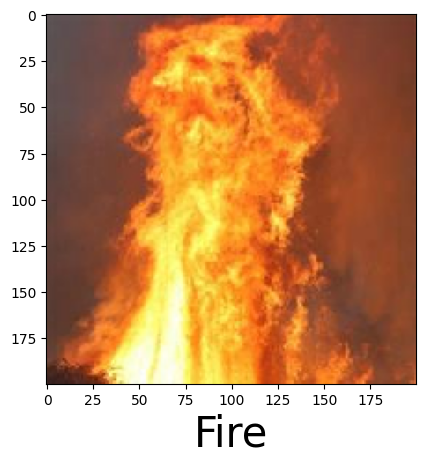

In [73]:
predictImage('Training and Validation/fire/abc011.jpg')

1/1 [==============================] - 0s 134ms/step
[[1.]]


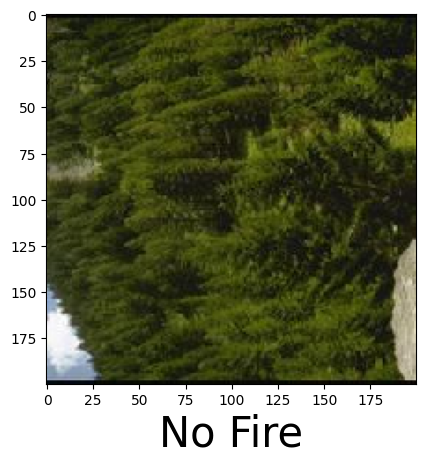

In [86]:
predictImage('Training and Validation/nofire/abc198.jpg')

## Training

1/1 [==============================] - 0s 102ms/step
[[0.]]


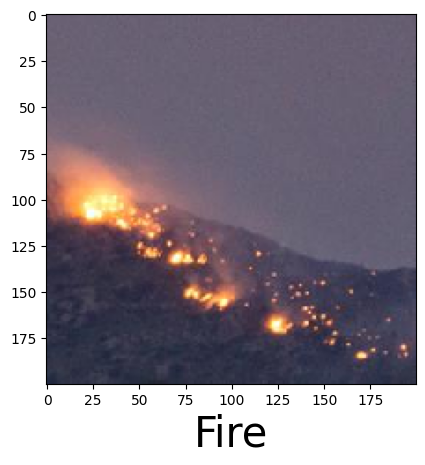

In [88]:
predictImage("Testing/fire/abc175.jpg")

1/1 [==============================] - 0s 299ms/step
[[0.]]


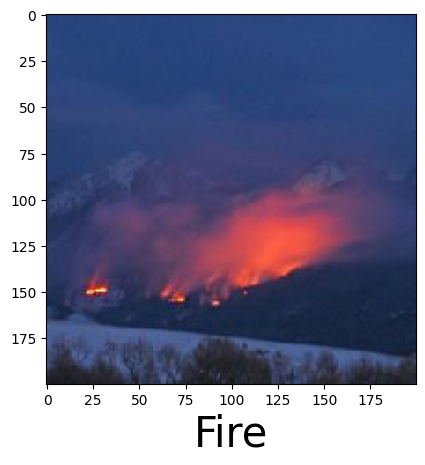

In [78]:
predictImage('Testing/fire/abc180.jpg')

1/1 [==============================] - 0s 186ms/step
[[1.]]


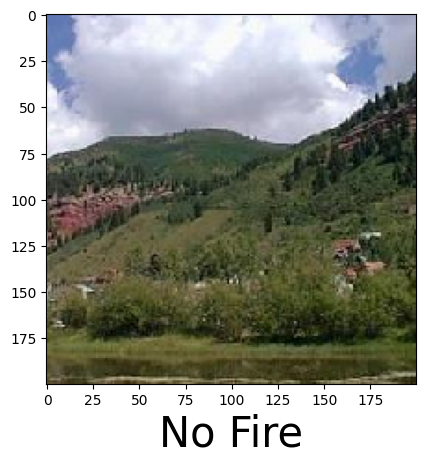

In [71]:
predictImage('Testing/nofire/abc346.jpg')

1/1 [==============================] - 0s 198ms/step
[[1.]]


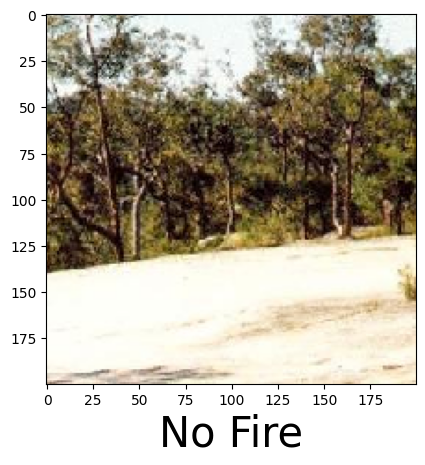

In [72]:
predictImage('Testing/nofire/abc361.jpg')

1/1 [==============================] - 0s 194ms/step
[[0.]]


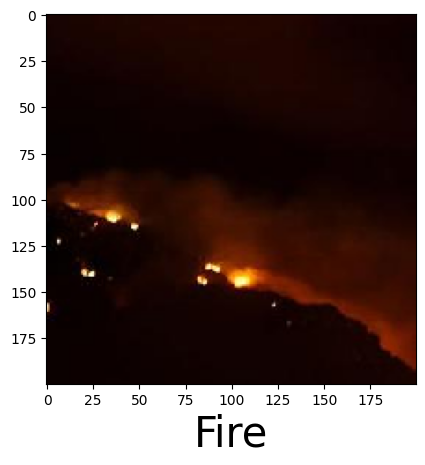

In [74]:
predictImage('Testing/fire/abc172.jpg')

1/1 [==============================] - 0s 167ms/step
[[1.]]


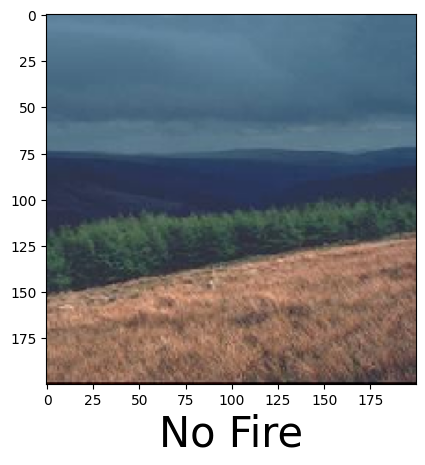

In [75]:
predictImage('Testing/nofire/abc341.jpg')



-----



## Kesimpulan

1. Trainingh Accuracy secara konsisten meningkat di atas epoch, mencapai 98,53% pada epoch ke -10.

2. Training loss berkurang, menunjukkan bahwa model ini belajar dan menjadi lebih akurat pada data pelatihan.

3. Namun, validation accuracy dan loss menunjukkan beberapa variabilitas. Ada penurunan akurasi validasi di epoch ke -2, dan kinerja model pada validation set berfluktuasi di semua epoch.

4. Model ini mencapai akurasi tinggi pada validation set, dengan puncak pada 97,06% di epoch ke -8.






## Saran



1. Model ini dapat mengambil manfaat dari teknik regularisasi untuk mengurangi overfitting dan meningkatkan generalisasi ke data yang tidak terlihat.

2. Memantau metrik tambahan dan melakukan penyetelan hiperparameter dapat lebih mengoptimalkan kinerja model.



---

